<a href="https://colab.research.google.com/github/BankNatchapol/Quantum-Tutorial/blob/main/VQE_Molecule_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install pylatexenc

In [ ]:
from qiskit import BasicAer
from qiskit.opflow import X, Z, I
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP, SPSA
from qiskit.circuit.library import EfficientSU2
from qiskit.providers.basicaer import QasmSimulatorPy  # local simulator

import numpy as np
import matplotlib.pyplot as plt

# Define Hamiltonian 
hydrogen atom 
$$\mathcal{H} = - \sum_I \frac{\nabla_{R_I}^2}{M_I} - \sum_i \frac{\nabla_{r_i}^2}{m_e} - \sum_I\sum_i  \frac{Z_I e^2}{|R_I-r_i|} + \sum_i \sum_{j>i} \frac{e^2}{|r_i-r_j|} + \sum_I\sum_{J>I} \frac{Z_I Z_J e^2}{|R_I-R_J|}$$

In [ ]:
hamiltonian  = (-1.052373245772859 * I ^ I) + \
              (0.39793742484318045 * I ^ Z) + \
              (-0.39793742484318045 * Z ^ I) + \
              (-0.01128010425623538 * Z ^ Z) + \
              (0.18093119978423156 * X ^ X)

# Define Ansatz
using EfficientSU2

In [ ]:
num_qubits = 2

In [ ]:
ansatz = EfficientSU2(num_qubits, reps=2, entanglement='linear', insert_barriers=True)
print(ansatz)

     ┌──────────┐┌──────────┐ ░       ░ ┌──────────┐┌──────────┐ ░       ░ »
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[2]) ├─░───■───░─┤ Ry(θ[4]) ├┤ Rz(θ[6]) ├─░───■───░─»
     ├──────────┤├──────────┤ ░ ┌─┴─┐ ░ ├──────────┤├──────────┤ ░ ┌─┴─┐ ░ »
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[3]) ├─░─┤ X ├─░─┤ Ry(θ[5]) ├┤ Rz(θ[7]) ├─░─┤ X ├─░─»
     └──────────┘└──────────┘ ░ └───┘ ░ └──────────┘└──────────┘ ░ └───┘ ░ »
«     ┌──────────┐┌───────────┐
«q_0: ┤ Ry(θ[8]) ├┤ Rz(θ[10]) ├
«     ├──────────┤├───────────┤
«q_1: ┤ Ry(θ[9]) ├┤ Rz(θ[11]) ├
«     └──────────┘└───────────┘


# Define Optimizer
using SPSA

In [ ]:
optimizer = SPSA(maxiter = 1000)

# Callback infomation

In [ ]:
intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def callback(nfev, parameters, energy, stddev):
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)

# Initialize parameters

In [ ]:
np.random.seed(0)
initial_point = np.random.random(ansatz.num_parameters)
initial_point

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492])

# Define VQE

with objective function
$$E_{min} = min\langle \Psi(\vec{\theta}) | H | \Psi(\vec{\theta}) \rangle$$

In [ ]:
local_vqe = VQE(ansatz=ansatz,
                optimizer=optimizer,
                initial_point=initial_point,
                quantum_instance=QasmSimulatorPy(),
                callback=callback)

# Running VQE to find mimum eigenvalue

In [ ]:
local_result = local_vqe.compute_minimum_eigenvalue(hamiltonian)

/usr/local/lib/python3.7/dist-packages/qiskit/utils/run_circuits.py:695: UserWarning: Option max_credits is not used by this backend
  return backend.run(circuits, **run_kwargs)


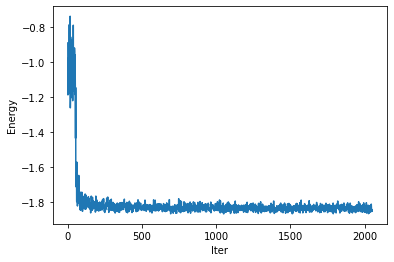

In [ ]:
plt.ylabel('Energy')
plt.xlabel('Iter')
plt.plot(intermediate_info['energy']);

# Evaluate

In [ ]:
print('Mean error:', np.mean(intermediate_info['stddev']))

Mean error: 0.009040134496295066


In [ ]:
local_result.__dict__

{'_aux_operator_eigenvalues': None,
 '_cost_function_evals': 2000,
 '_eigenstate': {'01': 0.9921567416492215, '10': 0.125},
 '_eigenvalue': (-1.8515325118738466+0j),
 '_optimal_parameters': {ParameterVectorElement(θ[0]): 1.6063743206566206,
  ParameterVectorElement(θ[10]): 1.1312403387915246,
  ParameterVectorElement(θ[11]): -0.7678578596860559,
  ParameterVectorElement(θ[1]): -0.31674997796351506,
  ParameterVectorElement(θ[2]): -0.14141423953851467,
  ParameterVectorElement(θ[3]): 0.4196370958998919,
  ParameterVectorElement(θ[4]): 0.4983402636713963,
  ParameterVectorElement(θ[5]): 0.5302148700931806,
  ParameterVectorElement(θ[6]): -0.7348134156605604,
  ParameterVectorElement(θ[7]): 0.915479936449036,
  ParameterVectorElement(θ[8]): 1.6862459875593157,
  ParameterVectorElement(θ[9]): 0.16207068667307217},
 '_optimal_point': array([ 1.60637432, -0.31674998, -0.14141424,  0.4196371 ,  0.49834026,
         0.53021487, -0.73481342,  0.91547994,  1.68624599,  0.16207069,
         1.131